In [1]:
import numpy as np
import os

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import PyPDF2

# data manager and analysis
import vodex as vx
import numan as nu

# writing files
import tifffile as tif

%load_ext autoreload
%autoreload 2

In [2]:
project_folder = "D:/Code/repos/numan/notebooks/data/2vs3vs5/"
path = os.path.join(project_folder, 'processed')

assert os.path.isdir(path), "the directory 'processed' doesn't exist in the project," \
                                " did you forget to run the previous notebook?"

os.chdir(path)
os.getcwd()

'D:\\Code\\repos\\numan\\notebooks\\data\\2vs3vs5\\processed'

In [3]:
# don't forget to give the conditions names - they are used for plotting. 
blank = vx.Condition(vx.Stimulus('blank','blank'), name = 'blank')
dot2 = vx.Condition(vx.Stimulus('2dot','2dot'), name = 'dot2')
dot3 = vx.Condition(vx.Stimulus('3dot','3dot'), name = 'dot3')
dot5 = vx.Condition(vx.Stimulus('5dot','5dot'), name = 'dot5')

experiment = vx.from_json(vx.Experiment,'experiment.json')
experiment.summary()

Total of 8 files.
Check the order :
[ 0 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0.ome.tif : 8910 frames
[ 1 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_1.ome.tif : 8909 frames
[ 2 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_2.ome.tif : 8909 frames
[ 3 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_3.ome.tif : 8909 frames
[ 4 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_4.ome.tif : 8909 frames
[ 5 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_5.ome.tif : 8909 frames
[ 6 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_6.ome.tif : 8909 frames
[ 7 ] 20220421_ok08_abtl_h2bcamp6s_9dpf_2v3v5_2P_1_MMStack_Pos0_7.ome.tif : 4092 frames

Cycle length: 3692
Condition ['blank']: for 364 frames
Condition ['3dot']: for 52 frames
Condition ['blank']: for 260 frames
Condition ['2dot']: for 52 frames
Condition ['blank']: for 312 frames
Condition ['5dot']: for 52 frames
Condition ['blank']: for 312 fra

In [4]:
def merge_idx(idx_list):
    return np.sort(np.concatenate(idx_list))

# indeces of the volumes to load
dot2_idx = experiment.select_volumes(dot2)
dot3_idx = experiment.select_volumes(dot3)
dot5_idx = experiment.select_volumes(dot5)
# as blank, we will take the blanks 1 volume before the stimuli
blank2_idx = dot2_idx - 1
blank3_idx = dot3_idx - 1
blank5_idx = dot5_idx - 1

print(f"We found:\n", 
      f"{dot2_idx.shape} volumes with 2dot")
print(f" {dot3_idx.shape} volumes with 3dot")
print(f" {dot5_idx.shape} volumes with 5dot")

We found:
 (54,) volumes with 2dot
 (54,) volumes with 3dot
 (54,) volumes with 5dot


In [9]:
file_path = "C:/Users/Lemon/Dropbox/File requests/Peter's Data/Peter Luu - signal and json/signal and json"
fish_id = "ok09"

spot_tag = "2vB"
spots2 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")
spots2.groups.keys()


dict_keys(['p2v5', 'p2v5_c', 'sig2v5', 'p3v5', 'p3v5_c', 'sig3v5', 'p2v3', 'p2v3_c', 'sig2v3', 'p2vB', 'p2vB_c', 'sig2vB', 'p3vB', 'p3vB_c', 'sig3vB', 'p5vB', 'p5vB_c', 'sig5vB', 'sigAny2v3v5vB', '2tuned'])

In [8]:
spots2.groups['p2v5_c']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

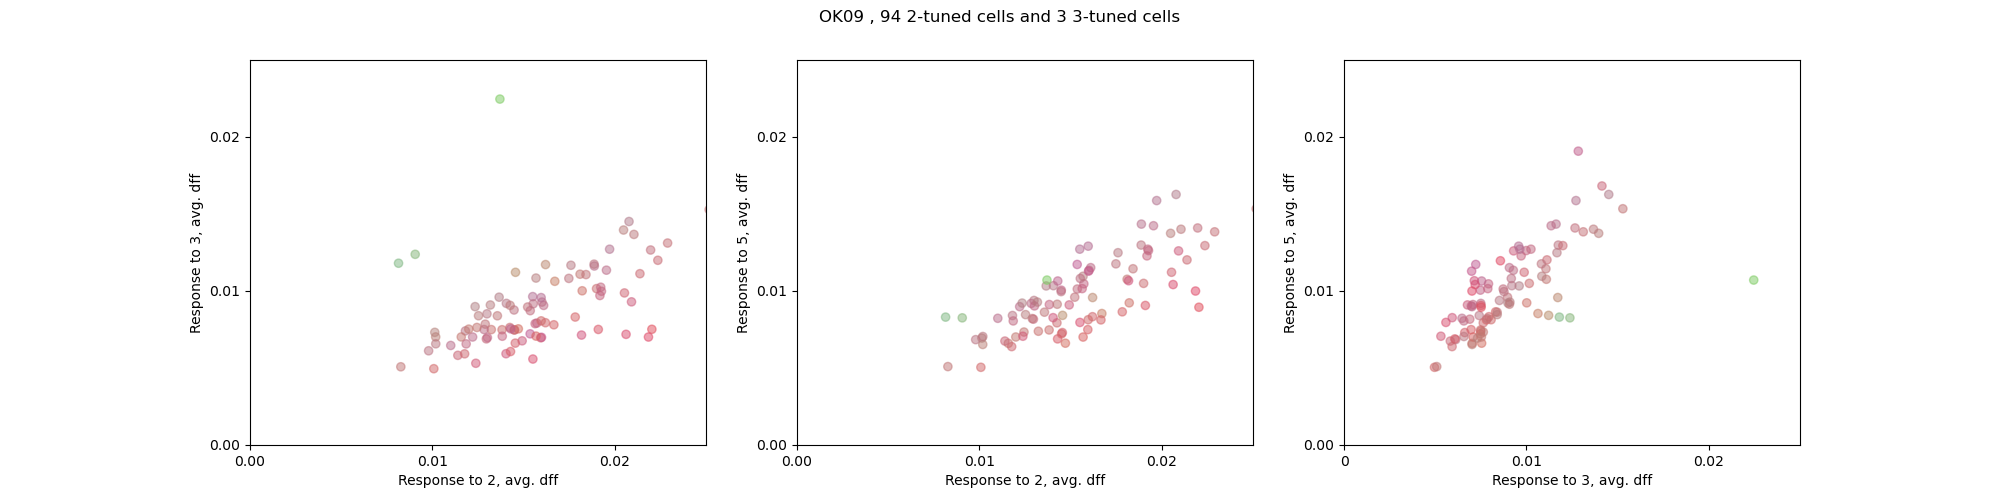

In [93]:

file_path = "C:/Users/Lemon/Dropbox/File requests/Peter's Data/Peter Luu - signal and json/signal and json"
fish_id = "ok09"

spot_tag = "2vB"
spots2 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")
spot_tag = "3v5"
spots3 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")

signals2 = spots2.get_group_signals(spots2.groups["2tuned"]).as_dff(15)
dot2_signal2 = signals2.traces[dot2_idx,:]
dot3_signal2 = signals2.traces[dot3_idx,:]
dot5_signal2 = signals2.traces[dot5_idx,:]
dot5_signal2.shape

signals3 = spots3.get_group_signals(spots3.groups["3tuned"]).as_dff(15)
dot2_signal3 = signals3.traces[dot2_idx,:]
dot3_signal3 = signals3.traces[dot3_idx,:]
dot5_signal3 = signals3.traces[dot5_idx,:]
dot5_signal3.shape

dot2_signal = np.c_[dot2_signal2,dot2_signal3]
dot3_signal = np.c_[dot3_signal2,dot3_signal3]
dot5_signal = np.c_[dot5_signal2,dot5_signal3]

dot235_rgb = np.vstack((dot2_signal.mean(axis = 0),dot3_signal.mean(axis = 0),dot5_signal.mean(axis=0)))
dot235_rgb.shape
dot235_rgb_norm = (dot235_rgb - dot235_rgb.min(axis = 0))

# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

dot235_rgb_norm = dot235_rgb/np.linalg.norm(dot235_rgb.T, axis = 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5))
fig.suptitle('OK09 , 94 2-tuned cells and 3 3-tuned cells')
ax = ax1
ax.scatter(dot235_rgb[0],dot235_rgb[1], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 3, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax2
ax.scatter(dot235_rgb[0],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax3
ax.scatter(dot235_rgb[1],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 3, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticklabels([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])



(54, 58)
(54, 1)


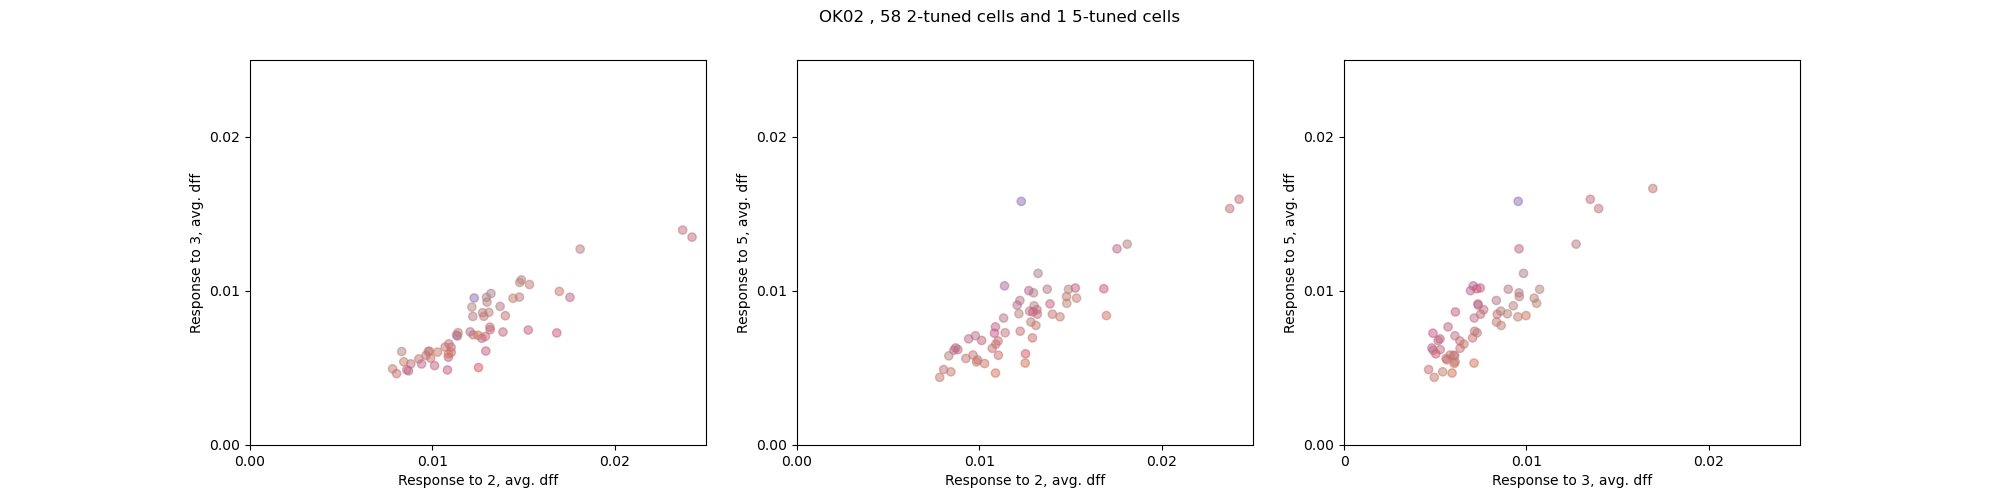

In [95]:

file_path = "C:/Users/Lemon/Dropbox/File requests/Peter's Data/Peter Luu - signal and json/signal and json"
fish_id = "ok02"

spot_tag = "2vB"
spots2 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")
spot_tag = "5vB"
spots3 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")

signals2 = spots2.get_group_signals(spots2.groups["2tuned"]).as_dff(15)
dot2_signal2 = signals2.traces[dot2_idx,:]
dot3_signal2 = signals2.traces[dot3_idx,:]
dot5_signal2 = signals2.traces[dot5_idx,:]
print(dot5_signal2.shape)

signals3 = spots3.get_group_signals(spots3.groups["5tuned"]).as_dff(15)
dot2_signal3 = signals3.traces[dot2_idx,:]
dot3_signal3 = signals3.traces[dot3_idx,:]
dot5_signal3 = signals3.traces[dot5_idx,:]
print(dot5_signal3.shape)

dot2_signal = np.c_[dot2_signal2,dot2_signal3]
dot3_signal = np.c_[dot3_signal2,dot3_signal3]
dot5_signal = np.c_[dot5_signal2,dot5_signal3]

dot235_rgb = np.vstack((dot2_signal.mean(axis = 0),dot3_signal.mean(axis = 0),dot5_signal.mean(axis=0)))
dot235_rgb.shape
dot235_rgb_norm = (dot235_rgb - dot235_rgb.min(axis = 0))

# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

dot235_rgb_norm = dot235_rgb/np.linalg.norm(dot235_rgb.T, axis = 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5))
fig.suptitle('OK02 , 58 2-tuned cells and 1 5-tuned cells')
ax = ax1
ax.scatter(dot235_rgb[0],dot235_rgb[1], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 3, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax2
ax.scatter(dot235_rgb[0],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax3
ax.scatter(dot235_rgb[1],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 3, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticklabels([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])



(54, 36)


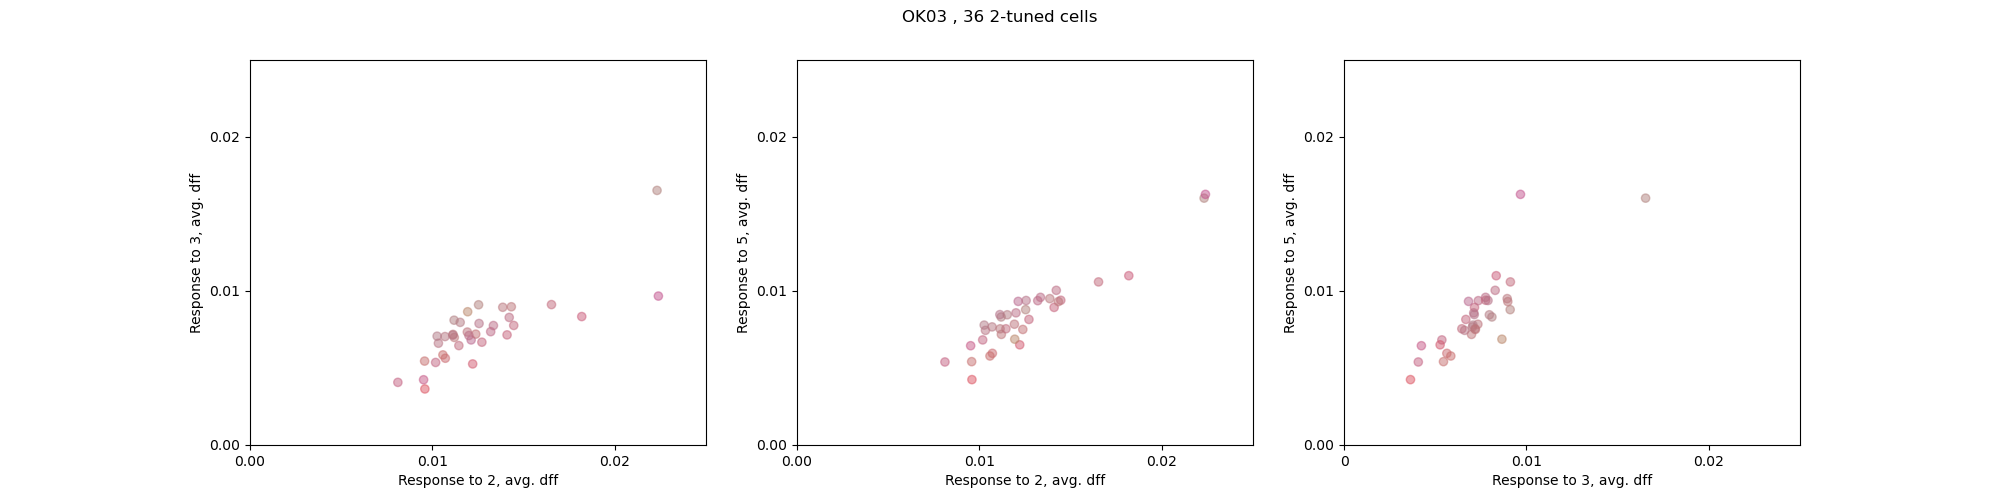

In [98]:

file_path = "C:/Users/Lemon/Dropbox/File requests/Peter's Data/Peter Luu - signal and json/signal and json"
fish_id = "ok03"

spot_tag = "2vB"
spots2 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")

signals2 = spots2.get_group_signals(spots2.groups["2tuned"]).as_dff(15)
dot2_signal = signals2.traces[dot2_idx,:]
dot3_signal = signals2.traces[dot3_idx,:]
dot5_signal = signals2.traces[dot5_idx,:]
print(dot5_signal.shape)


dot235_rgb = np.vstack((dot2_signal.mean(axis = 0),dot3_signal.mean(axis = 0),dot5_signal.mean(axis=0)))
dot235_rgb.shape
dot235_rgb_norm = (dot235_rgb - dot235_rgb.min(axis = 0))

# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

dot235_rgb_norm = dot235_rgb/np.linalg.norm(dot235_rgb.T, axis = 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5))
fig.suptitle('OK03 , 36 2-tuned cells')
ax = ax1
ax.scatter(dot235_rgb[0],dot235_rgb[1], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 3, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax2
ax.scatter(dot235_rgb[0],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax3
ax.scatter(dot235_rgb[1],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 3, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticklabels([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])



(54, 54)


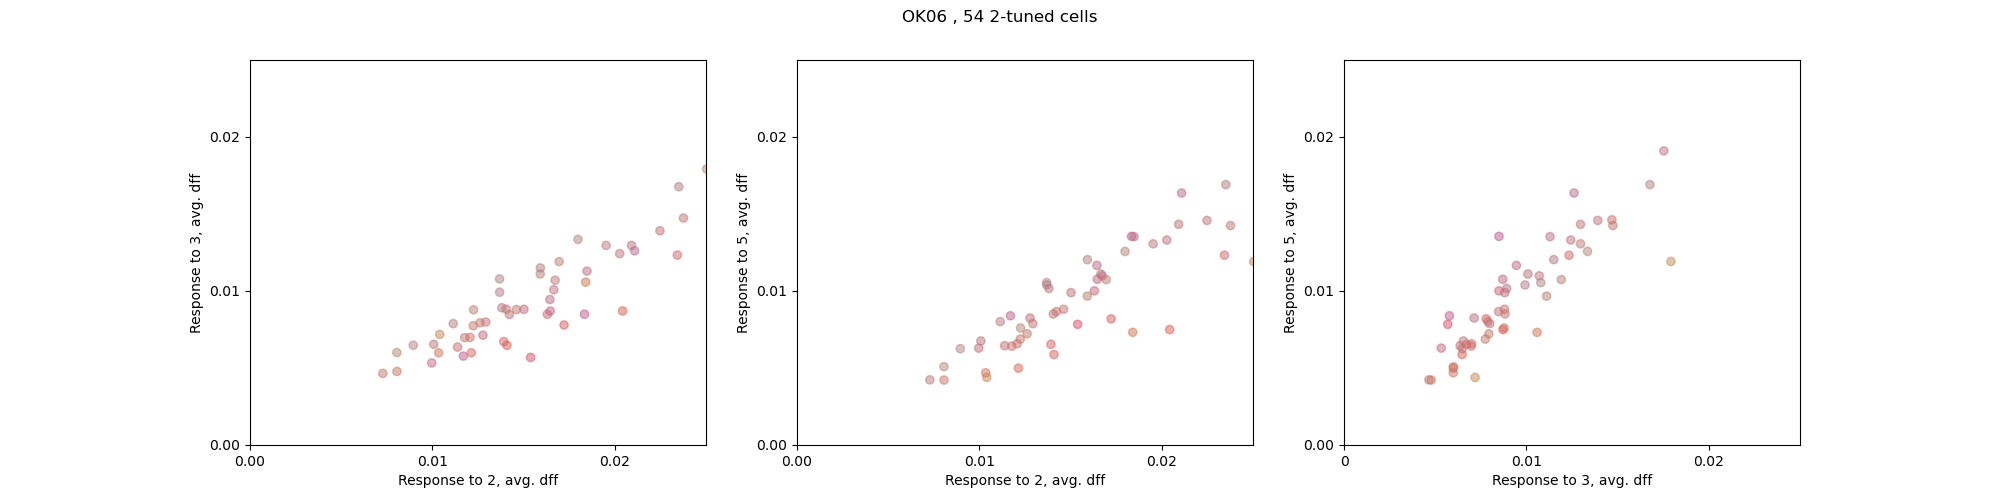

In [102]:

file_path = "C:/Users/Lemon/Dropbox/File requests/Peter's Data/Peter Luu - signal and json/signal and json"
fish_id = "ok06"

spot_tag = "2vB"
spots2 = nu.Spots.from_json(f"{file_path}/{fish_id}/signals/spots_{spot_tag}.json")

signals2 = spots2.get_group_signals(spots2.groups["2tuned"]).as_dff(15)
dot2_signal = signals2.traces[dot2_idx,:]
dot3_signal = signals2.traces[dot3_idx,:]
dot5_signal = signals2.traces[dot5_idx,:]
print(dot5_signal.shape)


dot235_rgb = np.vstack((dot2_signal.mean(axis = 0),dot3_signal.mean(axis = 0),dot5_signal.mean(axis=0)))
dot235_rgb.shape
dot235_rgb_norm = (dot235_rgb - dot235_rgb.min(axis = 0))

# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

dot235_rgb_norm = dot235_rgb/np.linalg.norm(dot235_rgb.T, axis = 1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5))
fig.suptitle('OK06 , 54 2-tuned cells')
ax = ax1
ax.scatter(dot235_rgb[0],dot235_rgb[1], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 3, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax2
ax.scatter(dot235_rgb[0],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 2, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])

ax = ax3
ax.scatter(dot235_rgb[1],dot235_rgb[2], c =dot235_rgb_norm.T, alpha = 0.5)
ax.set_xlabel('Response to 3, avg. dff')
ax.set_ylabel('Response to 5, avg. dff')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_xticklabels([0,0.01,0.02])
ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])



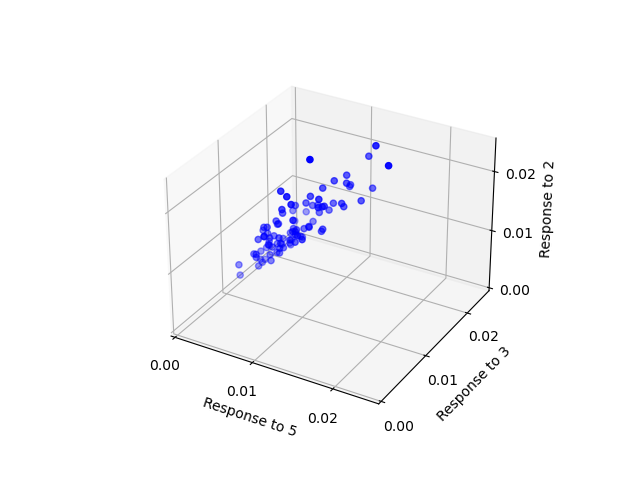

In [22]:
from mpl_toolkits import mplot3d

%matplotlib widget

# plotting code goes here
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(dot5_signal.mean(axis = 0), dot3_signal.mean(axis = 0), dot2_signal.mean(axis = 0), c = 'blue', cmap='Greens');
ax.set_xlabel('Response to 5')
ax.set_ylabel('Response to 3')
ax.set_zlabel('Response to 2')
ax.set_xlim(0,0.025)
ax.set_ylim(0,0.025)
ax.set_zlim(0,0.025)

ax.set_xticks([0,0.01,0.02])
ax.set_yticks([0,0.01,0.02])
ax.set_zticks([0,0.01,0.02])


In [73]:
dot5_signal.mean(axis = 0).shape


(94,)

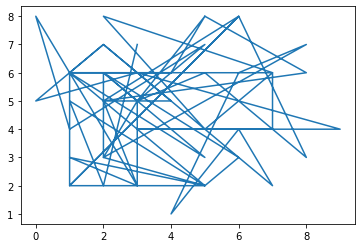

In [66]:
import math 
import colorsys

image_size = 10
highest_value = np.zeros((image_size, image_size))
def rgb_to_point(rgb):
    hsv = colorsys.rgb_to_hsv(*rgb)
    

    rads = math.tau * hsv[0] - math.pi
    mag = hsv[1] * (image_size/2) - 1 
    x = int(math.cos(rads) * mag + (image_size/2))
    y = int(math.sin(rads) * mag + (image_size/2))
    if(hsv[2] > highest_value[x][y]):
        highest_value[x][y] = hsv[2]
    return (x, y)

x = []
y = []
for pixel in dot235_rgb.T:

    c = rgb_to_point(pixel)
    if(c):
        x.append(c[0])
        y.append(c[1])
        
plt.plot(x,y)

NameError: name 'imgo' is not defined

In [57]:
pixel

array([ 0.00873253,  0.00732901,  0.01126985,  0.00795893,  0.00689681,
        0.01280609,  0.00491989,  0.00722097,  0.01803332,  0.01139445,
        0.00207727,  0.02140674,  0.02920874,  0.00925199,  0.00563489,
        0.0131791 ,  0.00267841,  0.00466243,  0.02662436, -0.00134796,
        0.02579419,  0.04182265,  0.01912518,  0.02843309,  0.00982914,
        0.01103465,  0.00712039,  0.01549707,  0.01834219,  0.02003702,
        0.01159791,  0.00458504,  0.02407729,  0.01528794,  0.01123137,
        0.01621522,  0.02142491,  0.00540345,  0.02009551,  0.00507937,
        0.00035979,  0.00245533,  0.02016675,  0.01008041,  0.0002696 ,
        0.00501999,  0.0070575 ,  0.00586069,  0.00089767,  0.01043012,
        0.01296992,  0.01408882,  0.00071662,  0.00555449])